In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Experiment 1 dynamic step size

In [3]:
np.random.seed(1)
m = 200
n= 100
X = np.random.normal(size=(m,n))
beta = np.ones((n,))
eps = np.random.normal(size=(m,))
y = X@beta + eps


In [4]:
def grad_F(theta):
    return 2*(X.T@X@theta - X.T@y)/m
def F(theta):
    return np.linalg.norm(X@theta - y)**2 / m
XTX = X.T@X
def partial(j,theta):
    return (2/n) * (XTX[j,:] @ theta - X.T[j,:] @ y)


In [5]:
theta_hat = np.linalg.inv(XTX)@X.T@y

### Step  a * 1/k for coordinate descent

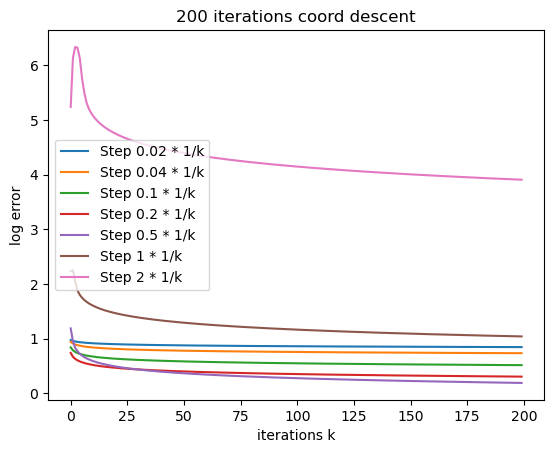

In [24]:
def t_k(k):
    return 1/(k)

scale = [1/50,1/25,1/10,1/5,1/2,1,2]

n_iter = 200

plt.figure()
for s in scale:
    theta_k = np.zeros(shape=(n_iter + 1,n))
    errors_k = np.zeros(shape=(n_iter,))
    for i in range(1, n_iter + 1):
        theta_k[i,:] = theta_k[i-1,:]
        for j in range(n):
            theta_k[i,j] = theta_k[i,j] - s*t_k(i)*partial(j,theta_k[i,:])

        errors_k[i-1] = np.linalg.norm(theta_hat - theta_k[i,:])
    
    
    plt.plot(np.log10(errors_k), label=f"Step {s} * 1/k")
    plt.title(f"{n_iter} iterations coord descent")
    plt.ylabel("log error")
    plt.xlabel("iterations k")
    plt.legend()

### Step  a * 1/sqrt(k) for coordinate descent

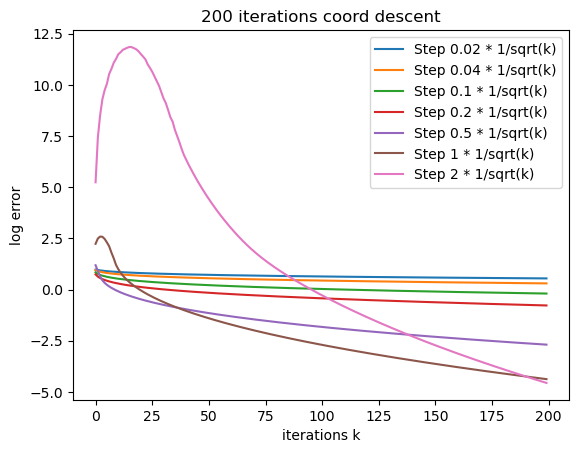

In [25]:
def t_k(k):
    return 1/(np.sqrt(k))

scale = [1/50,1/25,1/10,1/5,1/2,1,2]

n_iter = 200

plt.figure()
for s in scale:
    theta_k = np.zeros(shape=(n_iter + 1,n))
    errors_k = np.zeros(shape=(n_iter,))
    for i in range(1, n_iter + 1):
        theta_k[i,:] = theta_k[i-1,:]
        for j in range(n):
            theta_k[i,j] = theta_k[i,j] - s*t_k(i)*partial(j,theta_k[i,:])

        errors_k[i-1] = np.linalg.norm(theta_hat - theta_k[i,:])
    
    
    plt.plot(np.log10(errors_k), label=f"Step {s} * 1/sqrt(k)")
    plt.title(f"{n_iter} iterations coord descent")
    plt.ylabel("log error")
    plt.xlabel("iterations k")
    plt.legend()

### Step  a * 1/k for gradient descent

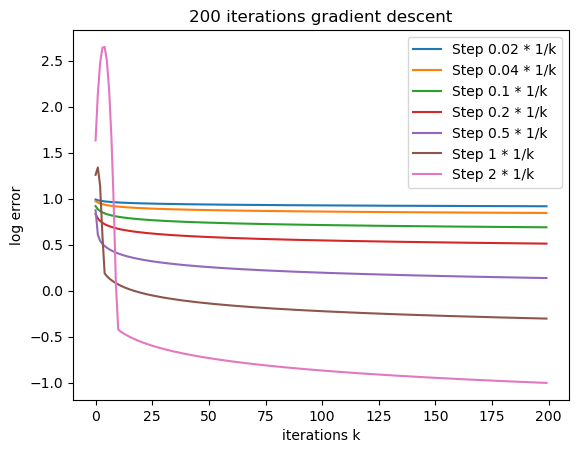

In [22]:
def t_k(k):
    return 1/(k)

scale = [1/50,1/25,1/10,1/5,1/2,1,2]

n_iter = 200
plt.figure()
for s in scale:
    theta_k = np.zeros(shape=(n_iter + 1,n))
    errors_k = np.zeros(shape=(n_iter,))
    for i in range(1, n_iter + 1):
        theta_k[i,:] = theta_k[i-1,:] - s*t_k(i)*grad_F(theta_k[i-1,:])
        errors_k[i-1] = np.linalg.norm(theta_hat - theta_k[i,:])
    
    
    plt.plot(np.log10(errors_k), label = f"Step {s} * 1/k")
    plt.title(f"200 iterations gradient descent")
    plt.ylabel("log error")
    plt.xlabel("iterations k")
    plt.legend()

### Step  a * 1/sqrt(k) for gradient descent

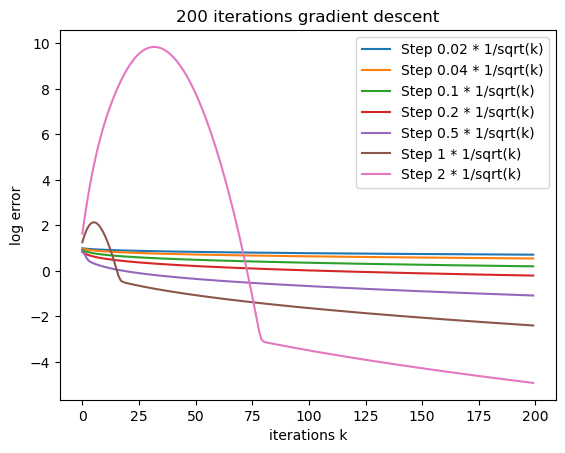

In [21]:
def t_k(k):
    return 1/(np.sqrt(k))

scale = [1/50,1/25,1/10,1/5,1/2,1,2]

n_iter = 200
plt.figure()
for s in scale:
    theta_k = np.zeros(shape=(n_iter + 1,n))
    errors_k = np.zeros(shape=(n_iter,))
    for i in range(1, n_iter + 1):
        theta_k[i,:] = theta_k[i-1,:] - s*t_k(i)*grad_F(theta_k[i-1,:])
        errors_k[i-1] = np.linalg.norm(theta_hat - theta_k[i,:])
    
    
    plt.plot(np.log10(errors_k), label = f"Step {s} * 1/sqrt(k)")
    plt.title(f"200 iterations gradient descent")
    plt.ylabel("log error")
    plt.xlabel("iterations k")
    plt.legend()

In [20]:
2 // 100

0